In [0]:
import numpy as np
import pandas as pd
import io
from google.colab import files

In [0]:
uploaded = files.upload()


Saving matches.csv to matches.csv


In [0]:
df = pd.read_csv(io.StringIO(uploaded['matches.csv'].decode('utf-8')))
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [0]:
# Q1 : Find the name of the player who won max number of man of the matches award in the period of 2010 and 2015 while plating in Mumbai [Easy]
df1=df[(df['season']>2009) & (df['season']<2016)&(df['city']=='Mumbai')]
print('Answer')
df1['player_of_match'].value_counts().head(1)

Answer


KA Pollard    6
Name: player_of_match, dtype: int64

In [0]:
# Q2 : Find the team who has won most number of matches with victory margin > 50 [Easy]
df[df['win_by_runs']>50]['winner'].value_counts().head(1)

Chennai Super Kings    11
Name: winner, dtype: int64

In [0]:
# Q3 : Write a function which will take 2 inputs, team 1 and team 2 and their record against each other

# For example if team1->KKR and team2->CSK

# The output should be like KKR 2(matches won by KKR) and CSK 5(matches won by CSK)[Medium]
def head_to_head(Team1,Team2):
  reqd=df[((df['team1']==Team1) & (df['team2']==Team2)) | ((df['team1']==Team2) & (df['team2']==Team1))]
  print(reqd.groupby('winner').count())
head_to_head('Royal Challengers Bangalore','Kolkata Knight Riders')
head_to_head('Kolkata Knight Riders','Royal Challengers Bangalore')
# works both ways
  

                             id  season  city  ...  umpire1  umpire2  umpire3
winner                                         ...                           
Kolkata Knight Riders        11      11    11  ...       11       11        0
Royal Challengers Bangalore   9       9     9  ...        9        9        0

[2 rows x 17 columns]
                             id  season  city  ...  umpire1  umpire2  umpire3
winner                                         ...                           
Kolkata Knight Riders        11      11    11  ...       11       11        0
Royal Challengers Bangalore   9       9     9  ...        9        9        0

[2 rows x 17 columns]


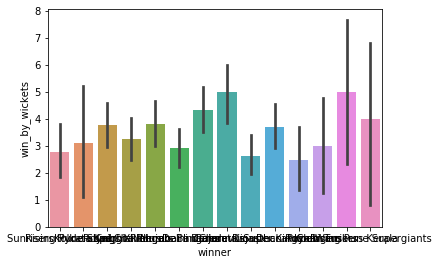

In [0]:
# Q4 : Plot a bar graph on win_by_wickets col. [Easy]
import seaborn as sns
sns.barplot(x='winner',y='win_by_wickets',data=df)

In [0]:
# Q5 : Write a function which will accept a team name as input and will return it's win percentage after winning the toss[Difficult] 
def win_per_toss(Team):
  reqd=df[df['toss_winner']==Team]
  total_matches = reqd.count()[1]
  matches_won = reqd[reqd['winner']==Team].count()[1]
  percentage_of_matches_won = (matches_won/total_matches)*100
  print(percentage_of_matches_won)
win_per_toss('Kolkata Knight Riders')

56.41025641025641
